In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import numpy as np
import custom_metrics as M
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from keras.models import model_from_json
from custom_layers import BatchNormalization, Softmax4D

from ipdb import set_trace as bp

In [2]:
    modeldir = '/opt/notebooks/LungNet/model-f9d4a3fa-66ec-4b72-b546-0dd778216a27' # change this with the correct model directory
    weightsf = 'weights.16-0.55.hdf5' # change this with the corresponding weights file in the modeldir

    # loads the model
    model = model_from_json(open(modeldir+'/architecture.json').read(), 
                            custom_objects={'BatchNormalization':BatchNormalization, 'Softmax4D':Softmax4D})
    model.load_weights(modeldir+'/'+weightsf)

    # loads the data
    db = np.load('/opt/notebooks/LungNet/covid-val.npz', allow_pickle=True)['db'][()]


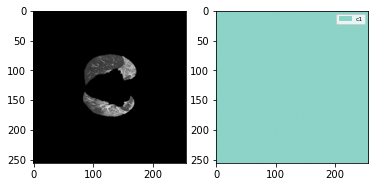

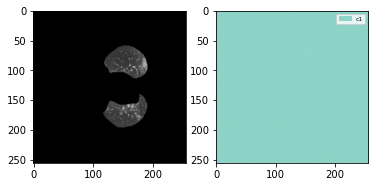

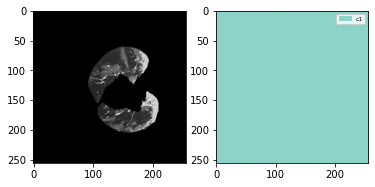

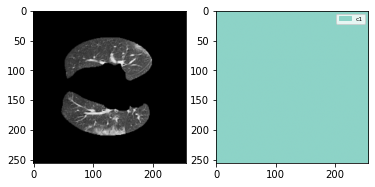

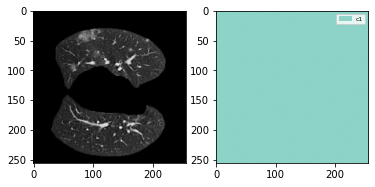

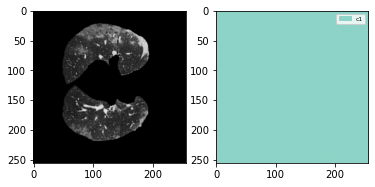

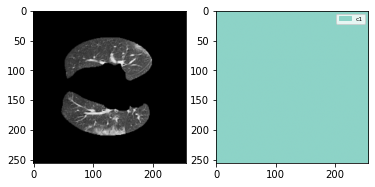

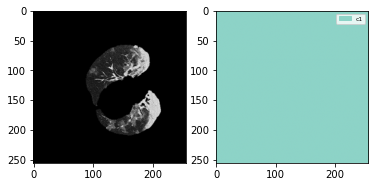

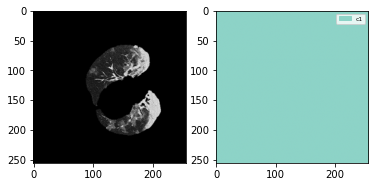

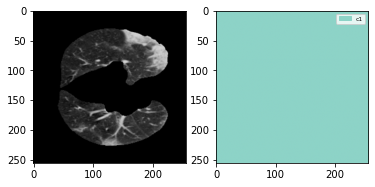

In [12]:
for i in range(10):
    # Forward pass
    X = db['X'][np.random.choice(len(db['X']))]
    Y_pred = model.predict(X[None,:,:,:])
    Y_lbls = np.argmax(Y_pred,axis=-1)

    all_labels = ['c1', 'c2', 'c3', 'background']
    colors = np.asarray([[141,211,199,255],
                         [255,255,179,255],
                         [190,186,218,255],
                         [251,128,114,255],
                         [128,177,211,255],
                         [253,180,98,255],
                         [179,222,105,255],
                         [252,205,229,255],
                         [217,217,217,255],
                         [188,128,189,255],
                         [204,235,197,255]]) / 255.
    plt.subplot(1, 2, 1)
    plt.imshow(np.squeeze(X),cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(colors[np.squeeze(Y_lbls)])
    plt.legend(handles=[mpatches.Patch(color=colors[i], label=all_labels[i]) for i in np.unique(Y_lbls)], prop={'size':6})
    plt.show()